# Importerer pandas og leser inn fil

In [ ]:
import pandas as pd
df = pd.read_excel('dataTableStudents_I.xlsx')

# Endrer navn på og gjør om tid-kolonnen til datetime

## datetime er en standardisert måte å vise tid på, trengs for å bruke funksjonen resample() til å aggregere

In [8]:
df.rename(columns= {'timeVectRelMinutes': 'datetime'}, inplace=True)
df['datetime'] = pd.to_datetime(df['datetime'], unit='m', origin='2020-01-30')
df

,datetime,battery_0__actualPower,thrusterAndPropulsion,sumEngMdoPower,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_
0,2020-01-30 00:00:00.000000000,0,0.0,0,250.0,250,0,6,0,0,0,0,0
1,2020-01-30 00:00:00.998999939,0,0.0,0,250.0,250,0,6,0,0,0,0,0
2,2020-01-30 00:00:01.998999840,0,0.0,0,250.0,250,0,6,0,0,0,0,0
3,2020-01-30 00:00:02.998999800,1,0.0,0,250.0,249,0,6,0,0,0,0,0
4,2020-01-30 00:00:03.999999960,1,0.0,0,250.0,249,0,6,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604795,2020-02-05 23:59:55.006999740,-20,1386.0,2037,631.0,0,2,3,0,0,994,0,1043
604796,2020-02-05 23:59:56.008999740,11,1408.0,2009,612.0,0,2,3,0,0,1057,0,952
604797,2020-02-05 23:59:57.006999600,11,1430.0,2116,697.0,0,2,3,0,0,1054,0,1062
604798,2020-02-05 23:59:58.007999820,17,1430.0,2015,602.0,0,2,3,0,0,1019,0,996


# Oppretter ny dataframe med minuttsoppløsning

In [18]:
new_df = df.resample('min', on='datetime').mean().reset_index()
new_df

,datetime,battery_0__actualPower,thrusterAndPropulsion,sumEngMdoPower,hotelLoad,shorePowerEstimated,numberOfMdoEnginesRunning,operationId,dpMode,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_
0,2020-01-30 00:00:00,-0.180328,0.000000,0.000000,250.000000,250.180328,0.0,6.0,0.0,0.0,0.000000,0.0,0.000000
1,2020-01-30 00:01:00,0.150000,0.000000,0.000000,250.000000,249.850000,0.0,6.0,0.0,0.0,0.000000,0.0,0.000000
2,2020-01-30 00:02:00,-0.016949,0.000000,0.000000,250.000000,250.016949,0.0,6.0,0.0,0.0,0.000000,0.0,0.000000
3,2020-01-30 00:03:00,0.081967,0.000000,0.000000,250.000000,249.918033,0.0,6.0,0.0,0.0,0.000000,0.0,0.000000
4,2020-01-30 00:04:00,0.016667,0.000000,0.000000,250.000000,249.983333,0.0,6.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,2020-02-05 23:55:00,-1.533333,1398.466667,2011.583333,611.583333,0.000000,2.0,3.0,0.0,0.0,1007.933333,0.0,1003.650000
10076,2020-02-05 23:56:00,1.916667,1364.733333,1954.433333,591.616667,0.000000,2.0,3.0,0.0,0.0,979.233333,0.0,975.200000
10077,2020-02-05 23:57:00,-2.333333,1358.133333,1975.483333,615.016667,0.000000,2.0,3.0,0.0,0.0,989.216667,0.0,986.266667
10078,2020-02-05 23:58:00,0.883333,1402.500000,2019.300000,617.683333,0.000000,2.0,3.0,0.0,0.0,1014.583333,0.0,1004.716667


# Plot av hotel load med sekundoppløsning og minuttoppløsning

<AxesSubplot:xlabel='datetime'>

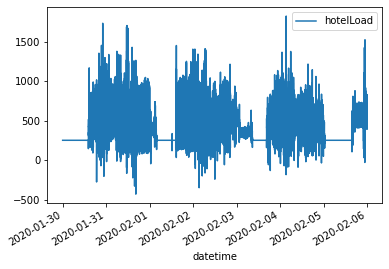

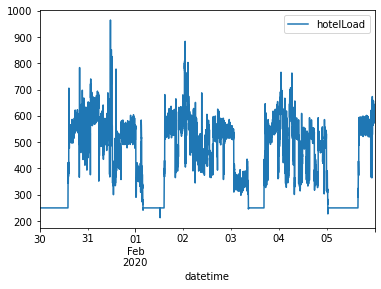

In [21]:
df.plot(x='datetime', y='hotelLoad')
new_df.plot(x='datetime', y='hotelLoad')